In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()
cancer_X = cancer.data
cancer_Y = cancer.target.reshape(-1, 1)

In [5]:
MMscale = MinMaxScaler()
#Sscaler = StandardScaler()

X_mmscaled = MMscale.fit_transform(cancer_X)
Y_mmscaled = MMscale.fit_transform(cancer_Y)

X_train, X_test, Y_train, Y_test = train_test_split(cancer_X, cancer_Y, random_state=0)
X_mmscaled_train, X_mmscaled_test, Y_mmscaled_train, Y_mmscaled_test = train_test_split(X_mmscaled, Y_mmscaled, random_state=0)

cancer_svc = SVC(C=1, kernel="rbf",  gamma="scale").fit(X_train, Y_train)
cancer_mmscale_svc = SVC().fit(X_mmscaled_train, Y_mmscaled_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
print(f"正規化前訓練データ精度＝＞{cancer_svc.score(X_train, Y_train)}")
print(f"正規化前テストデータ精度＝＞{cancer_svc.score(X_test, Y_test)}")
print(f"正規化後訓練データ精度＝＞{cancer_mmscale_svc.score(X_mmscaled_train, Y_mmscaled_train)}")
print(f"正規化後テストデータ精度＝＞{cancer_mmscale_svc.score(X_mmscaled_test, Y_mmscaled_test)}")

正規化前訓練データ精度＝＞0.903755868544601
正規化前テストデータ精度＝＞0.9370629370629371
正規化後訓練データ精度＝＞0.9835680751173709
正規化後テストデータ精度＝＞0.972027972027972


In [ ]:
cancer_mmscale_svc = SVC(C=10).fit(X_mmscaled_train, Y_mmscaled_train)
cancer_svc = SVC(C=100).fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC

In [ ]:
digits = load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

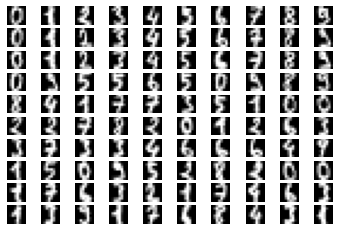

In [ ]:
i = 0
while i < 100:
  plt.subplot(10, 10, i + 1)
  plt.axis("off")
  plt.imshow(digits.images[i], cmap="gray")
  i += 1

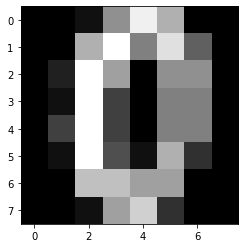

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0
1,0.0,0.0,11.0,16.0,8.0,14.0,6.0,0.0
2,0.0,2.0,16.0,10.0,0.0,9.0,9.0,0.0
3,0.0,1.0,16.0,4.0,0.0,8.0,8.0,0.0
4,0.0,4.0,16.0,4.0,0.0,8.0,8.0,0.0
5,0.0,1.0,16.0,5.0,1.0,11.0,3.0,0.0
6,0.0,0.0,12.0,12.0,10.0,10.0,0.0,0.0
7,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0


In [ ]:
plt.imshow(digits.images[10], cmap="gray")
number_data = pd.DataFrame(digits.images[10])
plt.show()
number_data

あとで8*8のデータを作る。

In [ ]:
X = digits.data
Y = digits.target
X = X.reshape(-1,64)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [ ]:
digits_classifier = LinearSVC(C=0.001)
digits_classifier.fit(X_train, Y_train)

LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print(f"train accuracy: {digits_classifier.score(X_train, Y_train)}")
print(f"test accuracy: {digits_classifier.score(X_test, Y_test)}")

train accuracy: 0.9829250185597624
test accuracy: 0.9644444444444444


In [ ]:
import cv2
from sklearn.externals import joblib
joblib.dump(digits_classifier, "mr_super_digits")

['mr_super_digits']

In [ ]:
test_img = cv2.imread("0.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
 def is_digits(filename):
   digits_classifier = joblib.load("mr_super_digits")
   img = cv2.imread(filename)
   img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   img = cv2.resize(img, (8, 8))
   img = 15 - img
   img = img.reshape(-1, 64)
   result = digits_classifier.predict(img)
   return (result[0])

In [ ]:
print(is_digits("super4.png"))

4
